Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

## PEC00025: Introdução à Teoria de Vibrações
### Trabalho 2.2 - Resposta de um sistema com múltiplos graus de liberdade a uma força impulsiva

Nome: Lucas Corona de Oliveira   
Matrícula: 00316465

[1. Objetivo](#section_1)  
[2. Estrutura](#section_2)  
[2.1 Matriz de Flexibilidade e Rigidez](#section_3)  
[2.2 Matriz de Massa](#section_4)   
[3. Frequências naturais e modos de vibração](#section_5)   
[4. Resposta a um impacto inicial](#section_6)   
[5. Amortecimento](#section_7)   


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc

### 1. Objetivo <a name="section_1"></a>   
O trabalho tem como objetivo apresentar os quatro primeiros modos de vibração da estrutura em estudo ao longo do trabalho 2. Além disso, calcular a resposta em deslocamento a uma velocidade inicial imposta à estrutura, plotar essa resposta para o grau de liberdade que recebe o impacto e calcular os parâmetros $\theta_i=-\frac{\pi}{2}$ e $u_imax$. Por fim, apresentar $\alpha_0$ e $\alpha_1$ para um amortecimento de 1% nos dois primeiros modos de vibração.

### 2. Estrutura <a name="section_2"></a> 
O modelo em estudo trata de uma estrutura de treliça plana feita no software FTool. Foi considerado o perfil Gerdau Aço-Minas W200x15 e módulo de elasticidade E=205000Mpa para todas as barras da estrutura. Para simplificação, foram adotados 11 graus de liberdade - deslocamento em y - dos nós centrais inferiores da estrutura. A estrutura e sua simplificação podem ser visualizadas abaixo.

<img src="data/trelica.png">

#### 2.1 Matriz de Flexibilidade e de Rigidez <a name="section_3"></a>   
Foram aplicadas cargas unitárias transitórias de $1kN$ em cada nó da estrutura. Para cada aplicação, foram anotados os valores de deslocamento em todos os graus de liberdade, de forma a encontrar a matriz de flexibilidade ($F$). Após obter a matriz de flexibilidade, é possível determinar a matriz de rigidez ($K$) da estrutura através da inversão da matriz $F$.

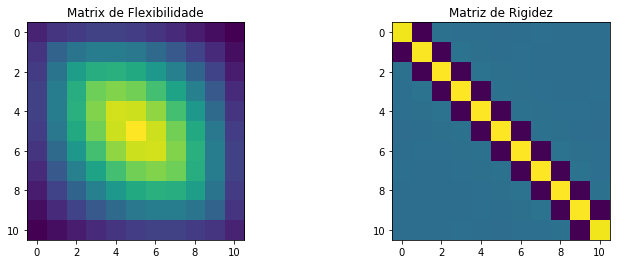

In [2]:
H1 = np.array ([[0.625, 0.868,	1.015,	1.081,	1.078,	1.019,	0.886,	0.721,	0.538,	0.348,	0.165],
[0.868,	1.665,	1.993,	2.150,	2.163,	2.057,	1.803,	1.480,	1.113,	0.727,	0.348],
[1.015,	1.993,	2.819,	3.107,	3.167,	3.039,	2.689,	2.226,	1.688,	1.113,	0.538],
[1.081,	2.150,	3.107,	3.849,	4.003,	3.891,	3.482,	2.910,	2.226,	1.480,	0.721],
[1.078,	2.163,	3.167,	4.003,	4.580,	4.536,	4.119,	3.482,	2.689,	1.803,	0.886],
[1.019,	2.057,	3.039,	3.891,	4.536,	4.897,	4.536,	3.891,	3.039,	2.057,	1.019],
[0.886,	1.803,	2.689,	3.482,	4.119,	4.536,	4.580,	4.003,	3.167,	2.163,	1.078],
[0.721,	1.480,	2.226,	2.910,	3.482,	3.891,	4.003,	3.849,	3.107,	2.150,	1.081],
[0.538,	1.113,	1.688,	2.226,	2.689,	3.039,	3.167,	3.107,	2.819,	1.993,	1.015],
[0.348,	0.727,	1.113,	1.480,	1.803,	2.057,	2.163,	2.150,	1.993,	1.665,	0.868],
[0.165,	0.348,	0.538,	0.721,	0.886,	1.019,	1.078,	1.081,	1.015,	0.868,	0.625]])*1e-07

K1 = np.linalg.inv(H1)

plt.figure(1, figsize=(12,4))
plt.subplot(1,2,1); plt.imshow(H1); plt.title('Matrix de Flexibilidade');
plt.subplot(1,2,2); plt.imshow(K1); plt.title('Matriz de Rigidez');


#### 2.2 Matriz de Massa <a name="section_4"></a> 
Para o problema, foi estipulada uma matriz de massa de forma que o primeiro modo de vibração apresente uma frequência natural abaixo de 2 Hertz.
Assim, a matriz de massa tipo lumped, fica:

In [3]:
# Matriz de massa em Kg
M1 = np.array([[3.5,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
[0,	3.5,	0,	0,	0,	0,	0,	0,	0,	0,	0],
[0,	0,	3.5,	0,	0,	0,	0,	0,	0,	0,	0],
[0,	0,	0,	3.5,	0,	0,	0,	0,	0,	0,	0],
[0,	0,	0,	0,	3.5,	0,	0,	0,	0,	0,	0],
[0,	0,	0,	0,	0,	3.5,	0,	0,	0,	0,	0],
[0,	0,	0,	0,	0,	0,	3.5,	0,	0,	0,	0],
[0,	0,	0,	0,	0,	0,	0,	3.5,	0,	0,	0],
[0,	0,	0,	0,	0,	0,	0,	0,	3.5,	0,	0],
[0,	0,	0,	0,	0,	0,	0,	0,	0,	3.5,	0],
[0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	3.5]])*1E3

### 3. Frequências naturais e modos de vibração <a name="section_5"></a>   
Em posse das matrizes de rigidez e de massa da estrutura, podemos determinar as frequências naturais de vibração e os modos de vibração a partir da resolução de um problema de autovalores e autovetores, dada pela seguinte relação:   

$$ \mathbf{K} \, \vec{\varphi}_k = \omega_k^2 \, \mathbf{M} \, \vec{\varphi}_k  $$ 

Com isso, encontramos os autovetores $\varphi_k$ e autovalores $\omega_k$ da estrutura, que nos permite encontrar as frequências naturais e os modos de vibração através da seguinte fórmula:   

$$ f_k=\frac{1}{2\pi w_k} $$

In [4]:
# Autovetores e autovalores
w21, Phi1 = sc.eig(K1, M1)

# Renumerar em ordem crescente
iw   = w21.argsort()
w21  = w21[iw]
Phi1 = -Phi1[:,iw]

# Converter os autovalores em frequências (Hz)
wk1  = np.sqrt(np.real(w21)) 
fk1  = wk1/2/np.pi

print ("fk =",fk1)

fk = [ 1.64884157  4.8059346   9.14322292 12.98845866 16.84814302 20.31666486
 23.45804391 25.88655343 27.94616304 29.48256841 30.31399731]


Abaixo, serão apresentados os quatro primeiros modos de vibração da estrutura:

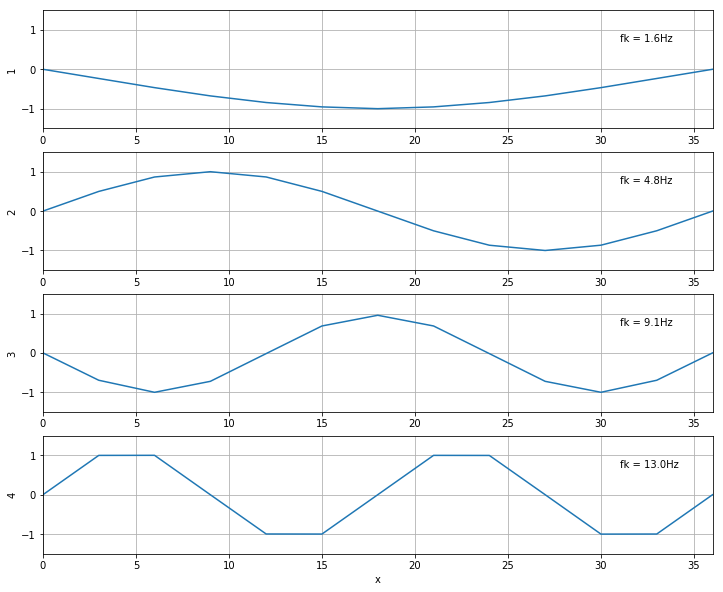

In [5]:
plt. figure(1, figsize=(12,10))
x=np.arange(0,39,3)

for k in range(4):
    pk = np.zeros(13)
    pk[1:-1] = Phi1[:,k]
    pk /= np.max(np.abs(pk))
    
    plt.subplot(4,1,k+1)
    plt.plot(x, pk)

    
    plt.xlim( 0.0, 36.0);
    plt.ylim(-1.5,  1.5);  plt.ylabel(str(k+1));
    plt.text(31, 0.7, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

plt.xlabel('x');

### 4. Resposta a um impacto inicial <a name="section_6"></a>   
  
Considera-se uma força de $10kN$, para baixo, atuando na massa central da treliça, com duração de $td = Tn/4$, onde $Tn$ é o menor periodo natural, ou seja, referente ao modo de vibração com maior valor de frequência natural.   
Com isso, podemos considerar a força como uma resposta impulsiva e considerar o impulso como uma velocidade inicial $v_0$.   

In [6]:
fmax = np.max(fk1)
print ("fmax =",fmax)
Fa = 10000
Tn = 1/fmax
td = Tn/4
m = 3.5e3
v0 = Fa*td/m

v0_v= [0,0,0,0,0,v0,0,0,0,0,0] # aplicação de v0 no nó central da estrutura
u0_v= np.zeros(11)

print ("v0 =",v0)

fmax = 30.313997312275077
v0 = 0.023562900891215616


A velocidade encontrada é então aplicada no nó central da estrutura. Com isso, podemos calcular os ângulos de fase e a amplitude para os nós. Sendo o deslocamento inicial nulo, temos que o ângulo será de $-\pi/2$.

u_max(m) = 0.000522392734888544


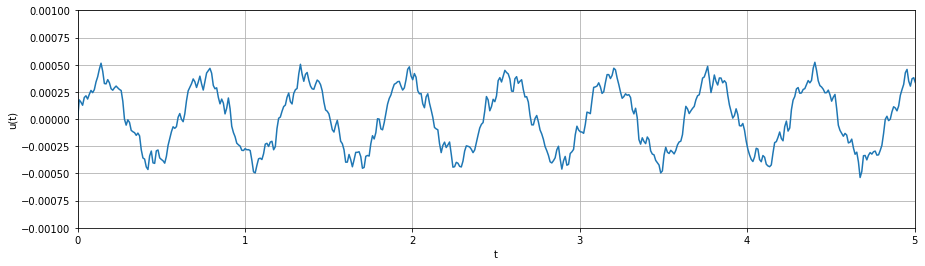

In [7]:
a = (11,11)
Phit = np.zeros(a)
U_MAX = np.zeros(11)

for k in range (11):
    
    Phit[k] = Phi1[k].transpose() #cálculo das transpostas dos autovalores
    
xi = np.pi/2
u_max = np.zeros(11)

for k in range (11):
    Mi = np.dot(np.dot(Phit[k], M1), Phi1[k])
    u_max = (np.dot(np.dot(Phit[k], M1),v0_v)) / (wk1[k]*np.sin(xi)*Mi)
    
    U_MAX[k] = u_max
    
t = np.linspace(0,10,1000)
b = (11, 1000)
uk = np.zeros(b)

for k in range(11):
    uk[k,:] = U_MAX[k]*np.cos(-wk1[k]*t - np.pi/2)
    
u = np.dot(Phi1, uk)

plt.figure(2, figsize=(15,4))
plt.plot(t, u[5,:])
plt.xlim( 0.0, 5.0);  plt.xlabel('t') 
plt.ylim(-0.001, 0.001);  plt.ylabel('u(t)') 
plt.grid(True)

print ("u_max(m) =", np.max(u))

O gráfico mostra o deslocamento no nó central após o impacto de 10kN.

### 5. Amortecimento <a name="section_7"></a>   

Para o cálculo do amortecimento foi utilizado o método de Rayleigh, em que a matriz de amortecimento é uma combinação linear das matrizes de rigidez e massa. Estimou-se um amortecimento inicial de 1% nos dois primeiros modos de vibração, e com isso foi possível encontrar os valores de $\alpha_0$ e $\alpha_1$. Finalmente, encontram-se os valores de amortecimento para os demais nós da estrutura.

Matriz de amortecimento: [0.01       0.01       0.01205481 0.01863674 0.02495663 0.03052571
 0.03551964 0.03935915 0.04260491 0.04502115 0.04632718]
alfa 0 = -0.24246059717972795
alfa 1 = 0.0004931385345939678


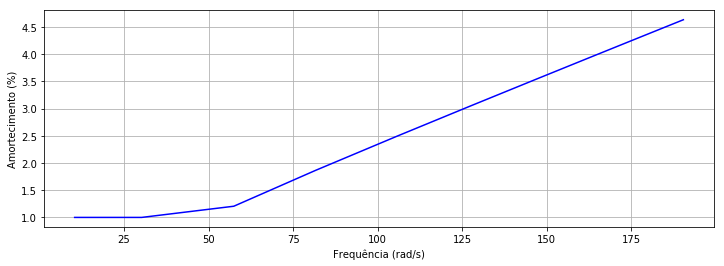

In [8]:
zeta = np.zeros(11)
zeta[0] = 0.01
zeta[1] = 0.01
alfa1= 2*(zeta[0]* wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0= 2*zeta[0]* wk1[0]-alfa1*wk1[1]**2

for k in range (9):
    zeta[k+2] = (alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)

print ("Matriz de amortecimento:", zeta)
print ("alfa 0 =",alfa0)
print ("alfa 1 =",alfa1)

plt.figure(3, figsize=(12,4))
plt.plot(wk1,zeta*100, color='blue'); plt.xlabel('Frequência (rad/s)'); plt.ylabel('Amortecimento (%)')
plt.grid(True)